<a href="https://colab.research.google.com/github/PreetiKharb/TensorFlow/blob/master/StockPricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#This program uses artificial recurrent neural network called Long Short Term Memory(LSTM)
# to predict the closing stock price of a corporation using the past 60 day stock price.


In [3]:
# Import lib
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [72]:
# Get the stock quote
df = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2020-12-17')
# Show the data
df 

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.669562
2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.737653
2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.879066
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,13.013701
2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.993060
...,...,...,...,...,...,...
2020-12-11,122.760002,120.550003,122.430000,122.410004,86939800.0,122.410004
2020-12-14,123.349998,121.540001,122.599998,121.779999,79184500.0,121.779999
2020-12-15,127.900002,124.129997,124.339996,127.879997,157572300.0,127.879997


In [73]:
#Get the number of rows and cols in data set
df.shape

(2256, 6)

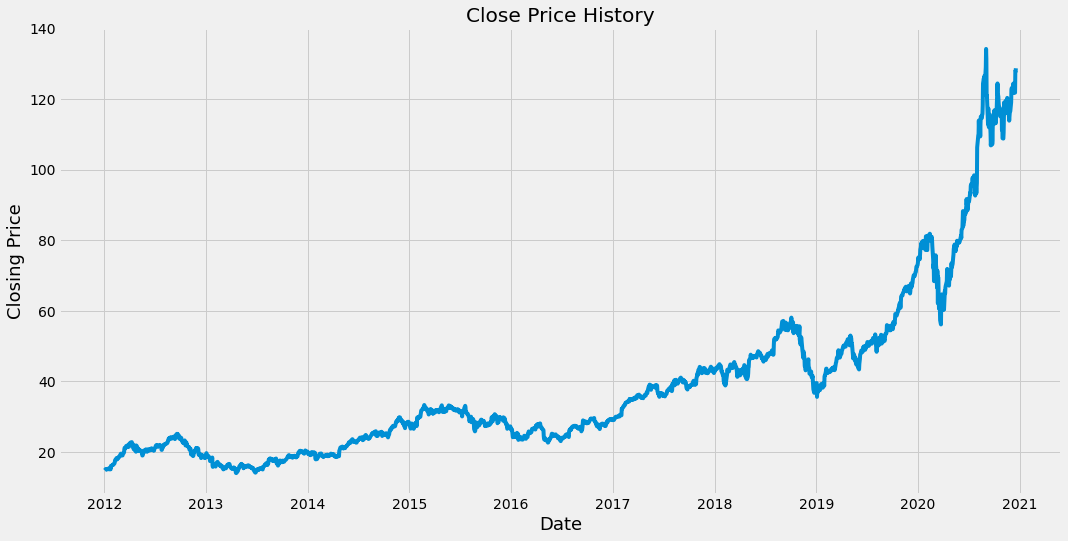

In [74]:
#visualize the closing price
plt.figure(figsize =(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Closing Price', fontsize=18)
plt.show()

In [75]:
# Create a new df with only Close column
data = df.filter(['Close'])
# Convert data to numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset) * 0.8)

training_data_len

1805

In [76]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.0061488 ],
       [0.00680526],
       [0.00816869],
       ...,
       [0.94760156],
       [0.94701935],
       [0.95442167]])

In [77]:
# Create the training data set
# Create the scaled training data set
train_data = scaled_data[0: training_data_len, :]

#Split the data x_train and y_train data set
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i,0])
  if i<= 61:
    print(x_train)
    print(y_train)
    print()

[array([0.0061488 , 0.00680526, 0.00816869, 0.00946678, 0.00926776,
       0.00971629, 0.00951133, 0.00916676, 0.00869743, 0.01014998,
       0.01145994, 0.01105596, 0.00884298, 0.01095496, 0.00887566,
       0.01667305, 0.01607006, 0.01685722, 0.01855928, 0.01959001,
       0.01950387, 0.01918604, 0.02054056, 0.02181487, 0.02325851,
       0.0255903 , 0.03048855, 0.03056281, 0.03328967, 0.03532738,
       0.03182525, 0.03317382, 0.03314709, 0.03692846, 0.0363908 ,
       0.03738589, 0.0391741 , 0.0401692 , 0.04303567, 0.04512387,
       0.04572687, 0.04593778, 0.04236733, 0.04150589, 0.04163362,
       0.04499022, 0.04593482, 0.04796363, 0.05274602, 0.05912652,
       0.0579324 , 0.05793537, 0.06254846, 0.0639921 , 0.06296431,
       0.06202567, 0.06104839, 0.06429507, 0.06652291, 0.06745562])]
[0.06515055661523342]

[array([0.0061488 , 0.00680526, 0.00816869, 0.00946678, 0.00926776,
       0.00971629, 0.00951133, 0.00916676, 0.00869743, 0.01014998,
       0.01145994, 0.01105596, 0.00

In [78]:
# Convert x_train and y_train data to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [79]:
#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1745, 60, 1)

In [80]:
#Build the LSTM model
model = Sequential()
model.add(LSTM( 50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [81]:
# Complile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [82]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

1745/1745 [==============================] - 42s 23ms/step - loss: 4.6853e-04


In [83]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2003
test_data = scaled_data[training_data_len-60:, :]
# Create the data sets x_test, y_test
x_test =[]
y_test = dataset[training_data_len:, :]

for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [84]:
# Convert the data to a numpy array
x_test = np.array(x_test)

In [85]:
# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
x_test.shape

(451, 60, 1)

In [86]:
# Get the model predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


In [87]:
# Get the root mean sqaured error (RMSE)
rmse = np.sqrt(np.mean(predictions - y_test)**2 )
rmse

1.2669510175277812

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


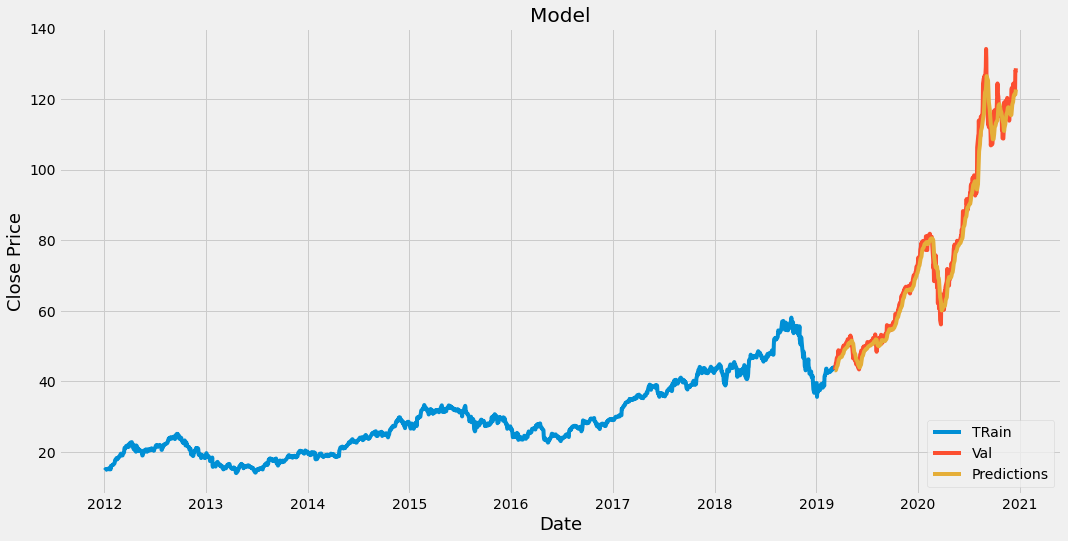

In [88]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

# visualize data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['TRain', 'Val','Predictions'], loc='lower right')
plt.show()

In [52]:
# Show the valid and predicted price
valid

,Close,Predictions
Date,,
2018-05-17,46.747501,47.038425
2018-05-18,46.577499,47.105064
2018-05-21,46.907501,47.107677
2018-05-22,46.790001,47.122192
2018-05-23,47.090000,47.123524
...,...,...
2019-12-11,67.692497,66.257881
2019-12-12,67.864998,66.480507
2019-12-13,68.787498,66.717148


In [91]:
# Get the quote
apple_quote = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2021-01-24')
# Create new data frame
new_df = apple_quote.filter(['Close'])

#Get the 60day closing price values and convert the df into array
last_60_days = new_df[-60:].values

#Scale the data
last_60_days_scaled = scaler.transform(last_60_days)

#Create empty list
X_test =[]

#Append the past 60 days
X_test.append(last_60_days_scaled)

#Convert the X_test data set to a np array
X_test = np.array(X_test)

#Reshape the data
X_test = np.reshape(X_test,(X_test.shape[0], X_test.shape[1],1))

#Get predicted price
pred_price = model.predict(X_test)

#undo the scaling
pred_price = scaler.inverse_transform(pred_price)

print(pred_price)

[[129.64655]]


In [92]:
apple_quote2 = web.DataReader('AAPL', data_source='yahoo', start='2021-01-25', end='2021-01-25')
apple_quote2['Close']

Date
2021-01-25    142.550003
Name: Close, dtype: float64